<a id="immod"></a>
## Modules and set up



[Back](#contents)

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import yt
from matplotlib.colors import LogNorm
import astropy.constants as c; import astropy.units as u
from astropy.io import fits
import tables
from scipy.ndimage import gaussian_filter
from yt.units.yt_array import YTQuantity as q

sp1_a = ['CO', 'CO_4_3', 'C18O', 'pNH3', 'HCN', 'C18O_4_3', 'N2H'] # in some data maybe CO_4_3 should be changed to CO_4-3
sp2_a = ['co', 'co_4_3', 'c18o', 'pnh3', 'hcn', 'c18o_4_3', 'n2h'] #
sp3_a = [r'CO 1$\to$0', r'CO 4$\to$3', r'C$^{18}$O 1$\to$0', r'NH$_3$', r'HCN', r'C$^{18}$O 4$\to$3', r'N$_2$H$^+$']
sp4_a = [r'CO', r'CO\ J=4$\to$3', r'C$^{18}$O', r'NH$_3$', r'HCN', r'C$^{18}$O\ J=4$\to$3', r'N$_2$H$^+$']
sp5_a = ['CO thin', 'CO J=4$\to$3 thin', 'C$^{18}$O thin', 'NH$_3$ thin', 'HCN thin', 
         'C$^{18}$O J=4$\to$3 thin', 'N$_2$H$^+$ thin']

#color_a = ['maroon','red','darkorange','greenyellow', 'aqua', 'blue', 'purple']
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
color_a = colors[0:7]

directory = 'C:/Users/YYX/Desktop/Tracers_LS_relation/Analysis'
PPV_dir = 'C:/Users/YYX/Desktop/Tracers_LS_relation/Analysis/PPV'

beta_a = ['02','2','20']
time_a = [10,30,60]
time_a2 = ['0.1$t_{\mathrm{ff}}$','0.3$t_{\mathrm{ff}}$','0.6$t_{\mathrm{ff}}$']
beta_a2 = ['0.2','2','20']
prj_ori_a = ['x','y','z']
prj_ori_a2 = ['$\parallel$','$\perp$','$\perp$']

<a id="contents"></a>
# Contents:
***
- [Load data](#load_data)
- [Slice and Projection Plot](#plot)
***
- [Luminosity-weighted mean second moment](#lum_weighted_second_moment) 
- [linewidth versus luminosity-weighted mean density](#lw_vs_lum_w_mean_den)
- [Opacity broadening](#opac_b)
- [linewidth versus opacity](#lw_vs_opac)
- [linewidth versus emitting sizes](#lw_vs_em_sizes)
- [investigation on different density scaling](#rescale)
- [Telescope effect](#telescope)
***


In [3]:
#parameter for simulation 
beta = '0.2'
beta2 = '02'
time = '10'
prj_ori = 'z'

# supersonic turbulence rescaled or not
rescale = 0
sca = '1'
# whether tracer is set to be optically thin
thin = 0
# whether levPop thick optically thin
thin2 = 0

In [36]:
np.log10(3.930e-20/2.34e-24)

4.225176692965284

<a id="load_data"></a>
## Load data 
[Back](#contents)

In [46]:
if thin==0:
    cube = yt.load(
        "%s/PPV/cube_%s_%s_%s.fits"%(directory,beta,time,prj_ori))
    for s in range(5):
        locals()['cube_L'+sp2[s]] = yt.load(
            "%s/PPV/cube_%s_%s_L%s_%s.fits"%(directory,beta,time,sp2[s],prj_ori))

yt : [WARNING  ] 2019-11-23 17:36:11,891 Cannot find time
yt : [INFO     ] 2019-11-23 17:36:11,903 Found length units of pc.
yt : [INFO     ] 2019-11-23 17:36:11,915 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-11-23 17:36:11,915 Parameters: domain_dimensions         = [256 256 201]
yt : [INFO     ] 2019-11-23 17:36:11,915 Parameters: domain_left_edge          = [0.5 0.5 0.5]
yt : [INFO     ] 2019-11-23 17:36:11,915 Parameters: domain_right_edge         = [256.5 256.5 201.5]
yt : [INFO     ] 2019-11-23 17:36:11,915 Parameters: cosmological_simulation   = 0.0
yt : [WARNING  ] 2019-11-23 17:36:11,961 Cannot find time
yt : [INFO     ] 2019-11-23 17:36:11,961 Found length units of pc.
yt : [INFO     ] 2019-11-23 17:36:11,980 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-11-23 17:36:11,980 Parameters: domain_dimensions         = [256 256 201]
yt : [INFO     ] 2019-11-23 17:36:11,980 Parameters: domain_left_edge          = [0.5 0.5 0.5]
yt : [INFO    

In [42]:
if thin==0:
    cube = yt.load(
        "%s/Beta%s_%s_%s/cube_%s_%s_%s.fits"%(directory,beta,time,prj_ori,beta,time,prj_ori))
    for s in range(5):
        locals()['cube_L'+sp2[s]] = yt.load(
            "%s/Beta%s_%s_%s/cube_%s_%s_L%s_%s.fits"%(directory,beta,time,prj_ori,beta,time,sp2[s],prj_ori))

yt : [WARNING  ] 2019-11-23 17:35:33,381 Cannot find time
yt : [INFO     ] 2019-11-23 17:35:33,401 Found length units of pc.
yt : [INFO     ] 2019-11-23 17:35:33,421 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-11-23 17:35:33,421 Parameters: domain_dimensions         = [256 256 101]
yt : [INFO     ] 2019-11-23 17:35:33,421 Parameters: domain_left_edge          = [0.5 0.5 0.5]
yt : [INFO     ] 2019-11-23 17:35:33,421 Parameters: domain_right_edge         = [256.5 256.5 101.5]
yt : [INFO     ] 2019-11-23 17:35:33,431 Parameters: cosmological_simulation   = 0.0
yt : [WARNING  ] 2019-11-23 17:35:33,460 Cannot find time
yt : [INFO     ] 2019-11-23 17:35:33,470 Found length units of pc.
yt : [INFO     ] 2019-11-23 17:35:33,481 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-11-23 17:35:33,481 Parameters: domain_dimensions         = [256 256 101]
yt : [INFO     ] 2019-11-23 17:35:33,481 Parameters: domain_left_edge          = [0.5 0.5 0.5]
yt : [INFO    

<a id="plot"></a>
# Slice and Projection plot
[Back](#contents)

yt : [INFO     ] 2019-11-23 17:36:14,785 Adding field density to the list of fields.
yt : [INFO     ] 2019-11-23 17:36:17,282 Projection completed
yt : [INFO     ] 2019-11-23 17:36:17,282 xlim = 0.500000 256.500000
yt : [INFO     ] 2019-11-23 17:36:17,282 ylim = 0.500000 256.500000
yt : [INFO     ] 2019-11-23 17:36:17,290 xlim = 0.500000 256.500000
yt : [INFO     ] 2019-11-23 17:36:17,290 ylim = 0.500000 256.500000
yt : [INFO     ] 2019-11-23 17:36:17,290 Making a fixed resolution buffer of (('fits', 'density')) 800 by 800
yt : [INFO     ] 2019-11-23 17:36:17,581 Adding field CO_Luminosity to the list of fields.
yt : [INFO     ] 2019-11-23 17:36:18,232 xlim = 0.500000 256.500000
yt : [INFO     ] 2019-11-23 17:36:18,236 ylim = 0.500000 256.500000
yt : [INFO     ] 2019-11-23 17:36:18,236 xlim = 0.500000 256.500000
yt : [INFO     ] 2019-11-23 17:36:18,236 ylim = 0.500000 256.500000
yt : [INFO     ] 2019-11-23 17:36:18,236 Making a fixed resolution buffer of (('fits', 'CO_Luminosity')) 800


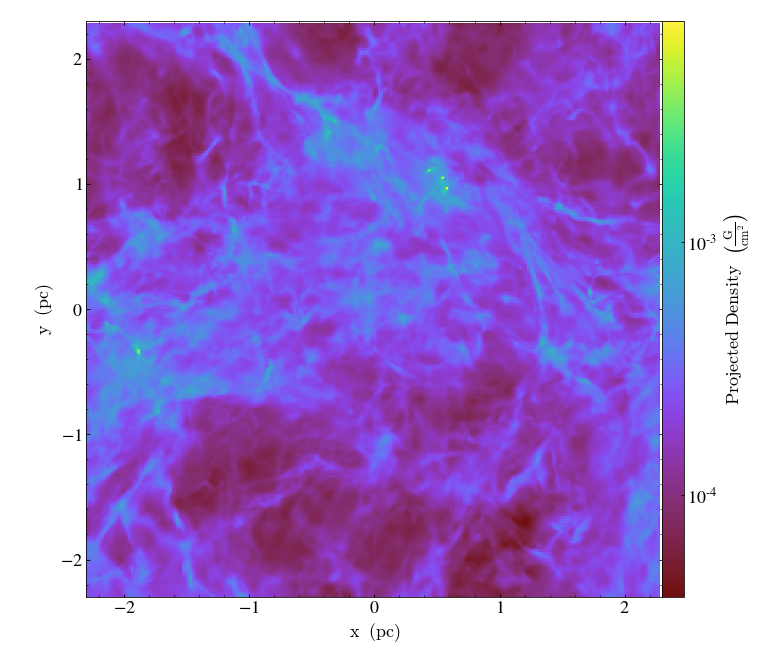


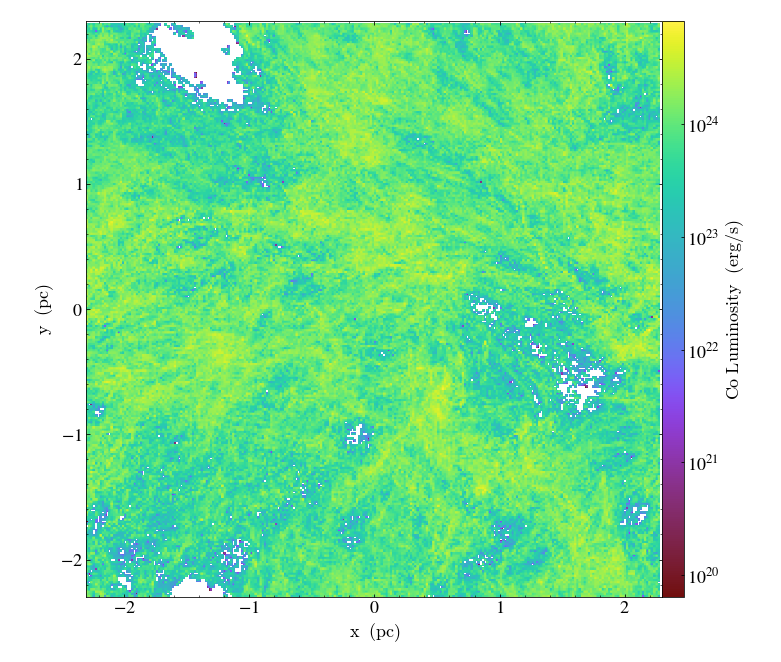


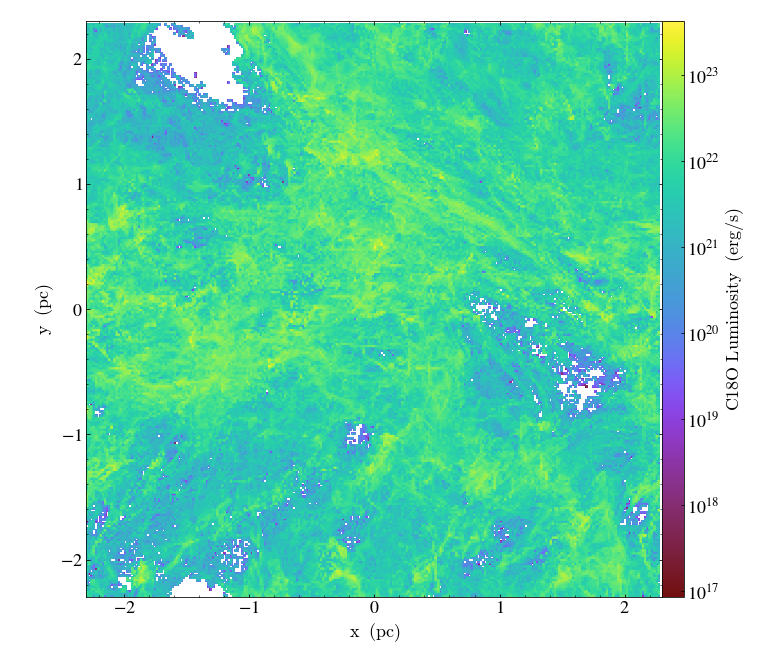


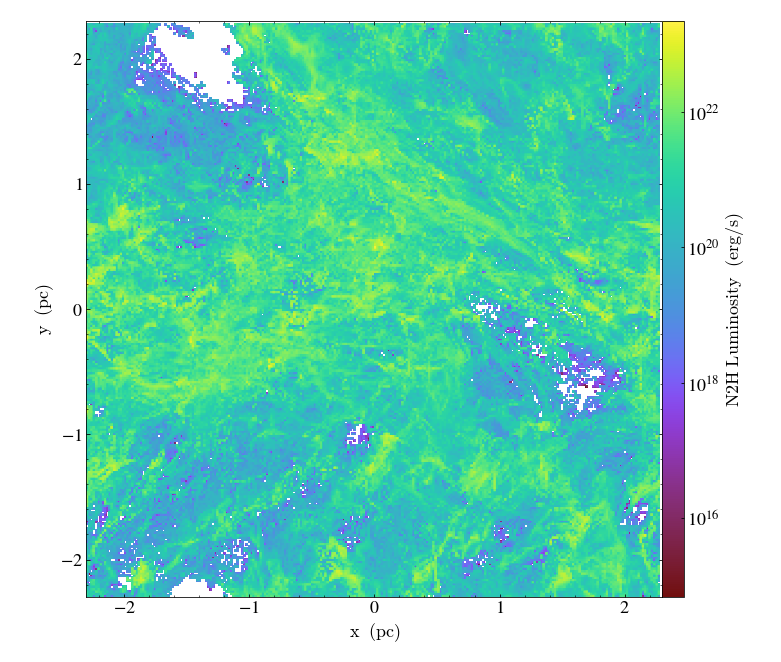


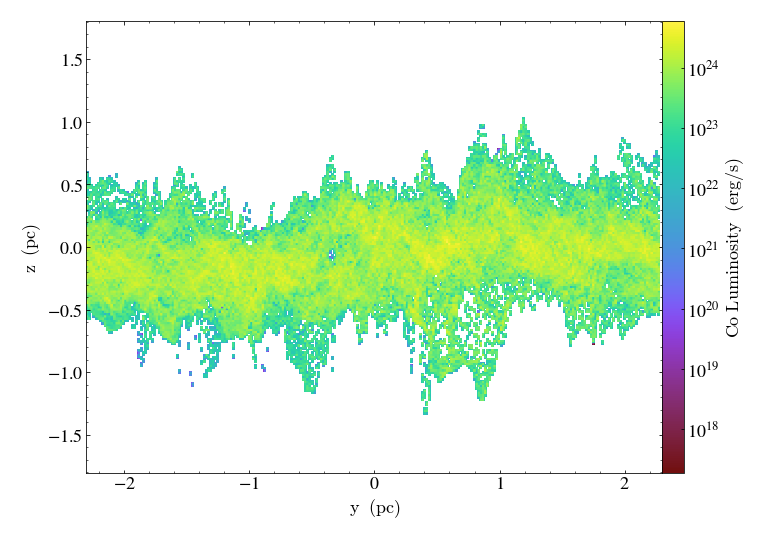


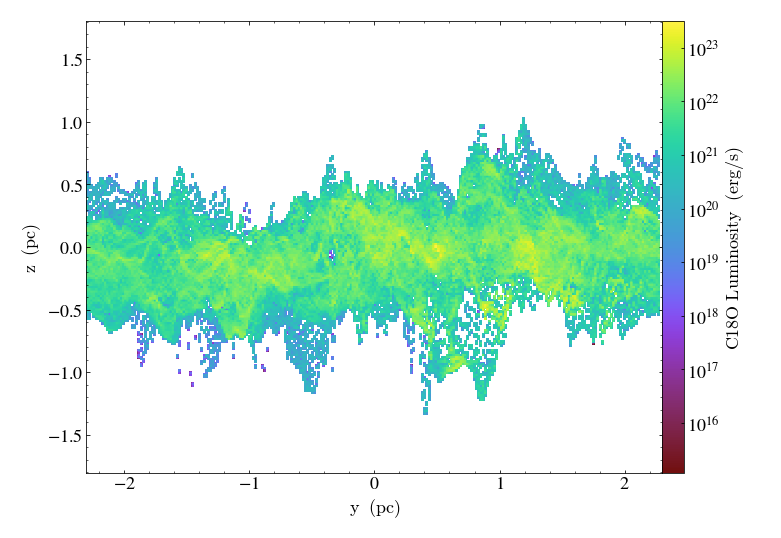


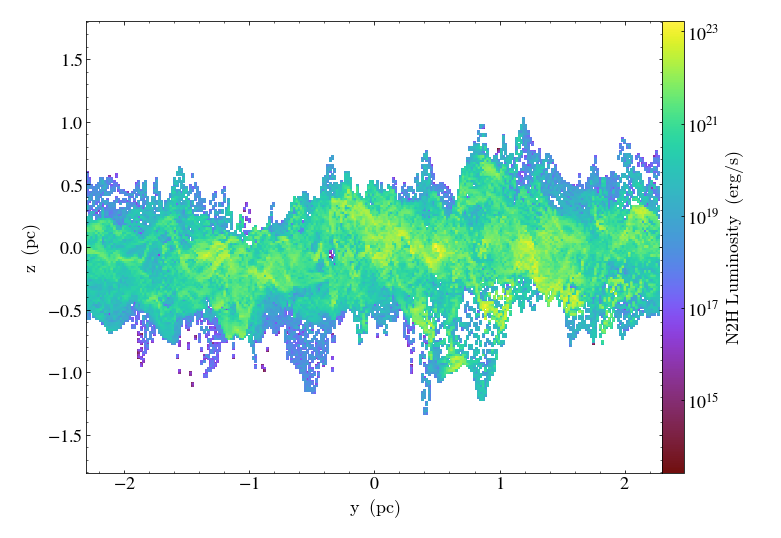

In [47]:
prj0 = yt.ProjectionPlot(cube,'z','density')
prj0.set_log("density", True) 
prj1 = yt.SlicePlot(cube_Lco,'z','CO_Luminosity')
prj1.set_log("CO_Luminosity", True)
prj2 = yt.SlicePlot(cube_Lc18o,'z','C18O_Luminosity')
prj2.set_log("C18O_Luminosity", True)
prj3 = yt.SlicePlot(cube_Ln2h,'z','N2H_Luminosity')
prj3.set_log("N2H_Luminosity", True)
s1 = yt.SlicePlot(cube_Lco,'x','CO_Luminosity')
s1.set_log("CO_Luminosity", True) 
s2 = yt.SlicePlot(cube_Lc18o,'x','C18O_Luminosity')
s2.set_log("C18O_Luminosity", True)
s3 = yt.SlicePlot(cube_Ln2h,'x','N2H_Luminosity')
s3.set_log("N2H_Luminosity", True)

prj0.show()
prj1.show()
prj2.show()
prj3.show()
s1.show()
s2.show()
s3.show()

<a id='lum_weighted_second_moment'></a>
### luminosity-weighted mean second moment 
[back](#contents)

plot

In [3]:
beta = '0.2'
time = '10'
prj_ori = 'z'
m2_mass = np.loadtxt("%s/beta%s_%s_%s/m2_true.txt"%(directory,beta,time,prj_ori))
for s, sp1 in zip(range(len(sp1_a)), sp1_a):
    locals()['m2_'+sp1] = np.loadtxt("%s/moment/beta%s_%s_%s/m2_%s.txt"%(directory,beta,time,prj_ori,sp1))

C:\Users\YYX\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


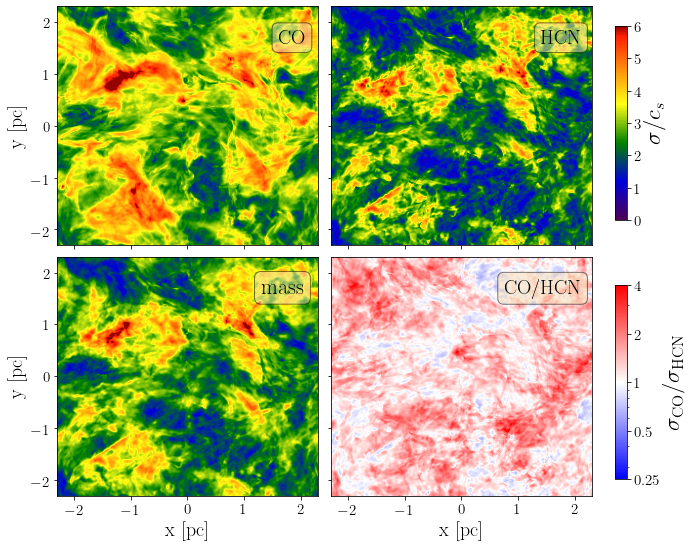

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(11, 9), sharex=True, sharey=True,
                        tight_layout=True, gridspec_kw = {'wspace':0.05, 'hspace':0.05})
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# Plot each graph, and manually set the y tick values
p0 = axs[0][0].imshow(m2_CO/0.2, aspect='auto', origin='lower',
                   cmap="bds_highcontrast",extent=(-2.3,2.3 ,-2.3 ,2.3 ),
                   vmin=0, vmax=6)
axs[0][0].set_ylabel("y [pc]",fontsize=20)
axs[0][0].text(1.6, 1.6, 'CO', c='black',fontsize=20, bbox=props)


p1 = axs[0][1].imshow(m2_HCN/0.2, aspect='auto', origin='lower',
           cmap="bds_highcontrast",extent=(-2.3,2.3 ,-2.3 ,2.3 ),
           vmin=0, vmax=6)
axs[0][1].text(1.4, 1.6, 'HCN', c='black',fontsize=20, bbox=props)

p2 = axs[1][0].imshow(m2_mass/0.2, aspect='auto', origin='lower',
           cmap="bds_highcontrast",extent=(-2.3,2.3 ,-2.3 ,2.3 ),
           vmin=0, vmax=6)
axs[1][0].set_xlabel("x [pc]",fontsize=20)
axs[1][0].set_ylabel("y [pc]",fontsize=20)
axs[1][0].text(1.3, 1.6, 'mass', c='black',fontsize=22, bbox=props)

p3 = axs[1][1].imshow(m2_CO/m2_HCN, aspect='auto', origin='lower',
                   cmap="bwr",Norm=LogNorm(),
                   extent=(-2.3,2.3 ,-2.3 ,2.3 ),
                   vmin=1/4, vmax=4)
axs[1][1].set_xlabel("x [pc]",fontsize=20)
axs[1][1].text(0.75, 1.6, 'CO/HCN', fontsize=20, bbox=props)#

fig.subplots_adjust(right=0.8)
cbar_ax1 = fig.add_axes([0.83, 0.55, 0.015, 0.30])
cbar_ax2 = fig.add_axes([0.83, 0.15, 0.015, 0.30])
cbar1 = fig.colorbar(p1,cax=cbar_ax1)
cbar1.set_label(r'$\sigma/c_s$',size=23)

cbar2 = fig.colorbar(p3, cax=cbar_ax2, ticks=[0.25, 0.5, 1, 2, 4])
cbar2.set_label(r'$\sigma_{\mathrm{CO}}/\sigma_{\mathrm{HCN}}$',size=23)
cbar2.ax.set_yticklabels(['0.25','0.5', '1', '2','4'])  # vertically oriented colorbar


plt.rc('text', usetex=True)
plt.rc('font', family='serif',size =15)
plt.savefig('figure/fig2.pdf')

<a id="lw_vs_lum_w_mean_den"></a>
## linewidth versus luminosity-weighted mean density
[Back](#contents)

In [132]:
rho_L = np.load("%s/quant/rho_L.npy"%directory)
tau_M = np.load("%s/quant/tau_m.npy"%directory)
lw = np.load("%s/quant/linewidth.npy"%directory)
lw_co_thin2 = np.load("%s/quant/linewidth_co_thin2.npy"%directory)
lw_true = np.load("%s/quant/linewidth_true.npy"%directory)
for i, beta in enumerate(beta_a):
    for j,time in enumerate(time_a):
        for k,prj_ori in enumerate(prj_ori_a): 
            locals()['x_%s_%d_%s'%(beta, time, prj_ori)] = rho_L[i,j,k,:]
            locals()['t_%s_%d_%s'%(beta, time, prj_ori)] = tau_M[i,j,k,:]
            locals()['y_%s_%d_%s'%(beta, time, prj_ori)] = lw[i,j,k,:]
            locals()['y_%s_%d_%s_t'%(beta, time, prj_ori)] = lw_true[i,j,k]

In [8]:
#data for luminosity-weighted mean density
mH = 2.34e-24
#order CO C18O pNH3 HCN N2H+
x02_10_t = [10**3.90]
x02_30_t = [10**4.39]
x02_60_t = [10**5.42]

x2_10_t = [10**3.87]
x2_30_t = [10**4.16]
x2_60_t = [10**5.73]

x20_10_t = [10**3.95]  
x20_30_t = [10**5.23]
x20_60_t = [10**6.35]

C:\Users\YYX\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


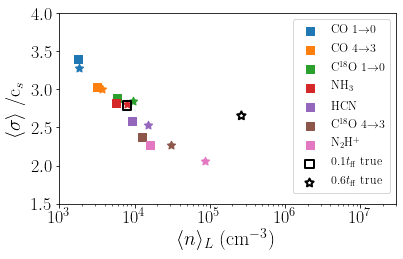

In [23]:
# in plot: different snapshot 
size = 75
beta = '02'
time_a = [10, 60]
beta_2 = '0.2'
prj_ori = 'z'
prj_ori_2 = '$\perp$'
marker = ['s',(5,1)]
sp4_a = [r'CO', r'CO\\n J=4$\to$3', r'C$^{18}$O', r'NH$_3$', r'HCN', r'C$^{18}$O\\n J=4$\to$3', r'N$_2$H$^+$']
for k,t in zip(range(len(time_a)),time_a):
    for s, sp3, color in zip(range(len(sp1_a)), sp3_a, color_a):
        if k==0:
            plt.scatter(locals()['x_%s_%d_%s'%(beta, t, prj_ori)][s], 
                        locals()['y_%s_%d_%s'%(beta, t, prj_ori)][s]/0.2, 
                        s=size, marker=marker[k],color = color, label=sp3)
        else:
            plt.scatter(locals()['x_%s_%d_%s'%(beta, t, prj_ori)][s], 
                        locals()['y_%s_%d_%s'%(beta, t, prj_ori)][s]/0.2, 
                        s=size, marker=marker[k],color = color)
for k,t in zip(range(len(time_a)),time_a):
    plt.scatter(locals()['x%s_%d_t'%(beta, t)], locals()['y_%s_%d_%s_t'%(beta, t, prj_ori)]/0.2, 
                s=size, color='', marker=marker[k], edgecolors='k',linewidth = 2.0 ,label="%.1f$t_{\mathrm{ff}}$ true"%(t/100))
plt.xscale('log')
plt.axis([1e3, 3e7, 1.5, 4.0])
plt.legend(loc='upper right',fontsize = 12)

plt.xlabel(r"$\langle n \rangle_L$ (cm$^{-3}$)",fontsize=20) 
plt.ylabel(r"$\langle \sigma \rangle$ /c$_s$",fontsize=20)
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)

plt.rc('text', usetex=True)
plt.rc('font', family='serif',size =20)
plt.tight_layout()
plt.savefig('figure/fig4.pdf')

C:\Users\YYX\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


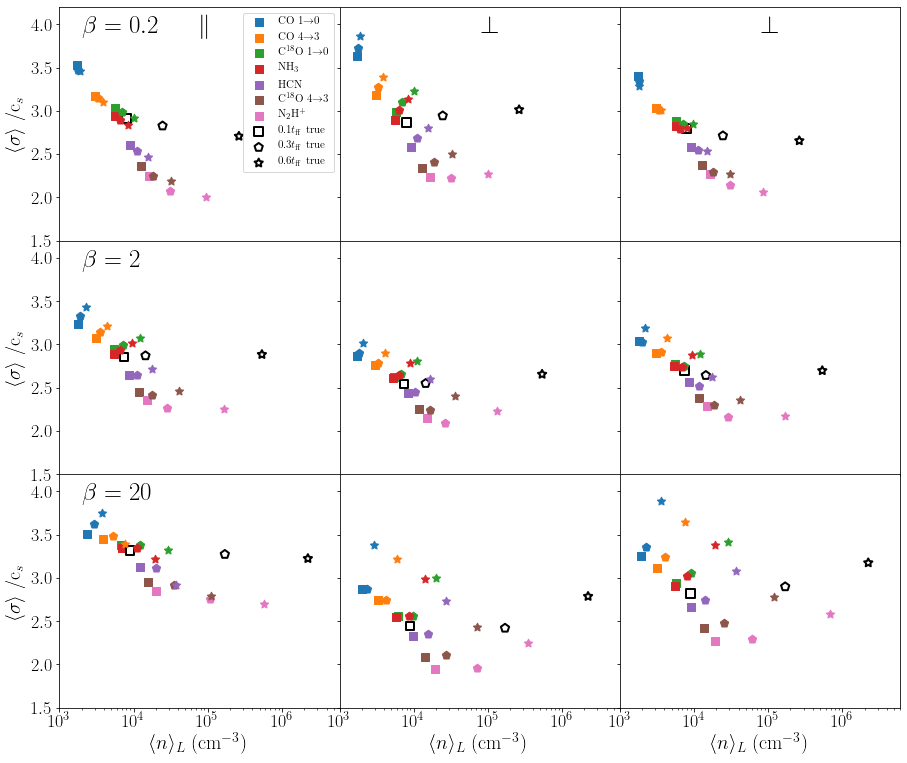

In [13]:
# row: different plasma beta  col: different orientation # in plot: different snapshot 
row = 3
col = 3
size = 75
beta_a = ['02','2','20']
time_a = [10,30,60]
beta_a2 = ['0.2','2','20']
prj_ori_a = ['x','y','z']; prj_ori_a2 = ['$\parallel$','$\perp$','$\perp$']
sp_index = [1]
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
c = colors[0:7]
marker = ['s',(5,0),(5,1)]

fig, axs = plt.subplots(row, col, figsize=(13, 11), sharex=True, sharey=True,
                        tight_layout=True, gridspec_kw = {'wspace':0, 'hspace':0})

for i, beta in zip(range(row), beta_a):
    for j, prj_ori in zip(range(col), prj_ori_a):
        # Plot each graph, and manually set the y tick values
        for k,t in zip(range(len(time_a)),time_a):
            for s, sp1, sp2, sp3 in zip(range(len(sp1_a)), sp1_a, sp2_a, sp3_a ):
                if k==0 and i==0 and j==0:
                    axs[i,j].scatter(locals()['x_%s_%d_%s'%(beta, t, prj_ori)][s], 
                                locals()['y_%s_%d_%s'%(beta, t, prj_ori)][s]/0.2, 
                                s=size, marker=marker[k],color = c[s], label=sp3)
                else:
                    axs[i,j].scatter(locals()['x_%s_%d_%s'%(beta, t, prj_ori)][s], 
                                locals()['y_%s_%d_%s'%(beta, t, prj_ori)][s]/0.2, 
                                s=size, marker=marker[k],color = c[s])

            axs[i,j].scatter(locals()['x%s_%d_t'%(beta, t)], locals()['y_%s_%d_%s_t'%(beta, t, prj_ori)]/0.2, 
                    s=size, color='', marker=marker[k], edgecolors='k',linewidth = 2.0 ,label="%.1f$t_{\mathrm{ff}}$ true"%(t/100))        
        plt.xscale('log')
        plt.axis([1e3, 6e6, 1.5, 4.2])
        if i==0 and j==0:
            axs[i,j].legend(loc='upper right',fontsize = 11)
            
        if j==0:
            axs[i,j].text(2e3, 3.9, r'$\beta=%s$'%beta_a2[i], fontsize=25)
        if i==0:
            axs[i,j].text(8e4, 3.9, prj_ori_a2[j], fontsize=25)

for ax in axs.flat:
    ax.set_xlabel(r"$\langle n \rangle_L$ (cm$^{-3}$)",fontsize=20) 
    ax.tick_params(axis="x", labelsize=18)
    ax.label_outer()
for ax in axs[:,0]:
    ax.tick_params(axis="y", labelsize=18)
    ax.set_ylabel(r"$\langle \sigma \rangle$ /c$_s$",fontsize=20)
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size =20)

plt.savefig('figure/appd_fig4.pdf')

<a id="opac_b"></a>
## opacity broadening
[Back](#contents)

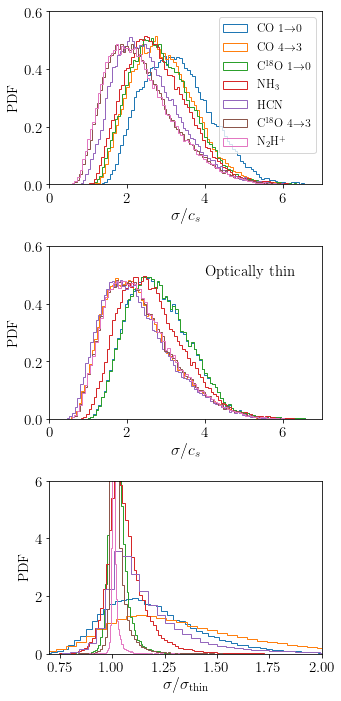

In [67]:
beta='0.2'
time='10'
for sp2, sp5 in zip(sp2_a, sp5_a):
    locals()['m2_'+sp2] = np.loadtxt("%s/moment/beta%s_%s_%s/m2_%s.txt"%(directory,beta,time,prj_ori,sp2))
    locals()['m2_'+sp2] = locals()['m2_'+sp2].flatten()
    locals()['m2_'+sp2+'_thin'] = np.loadtxt("%s/moment/beta%s_%s_%s/m2_%s_thin.txt"%(directory,beta,time,prj_ori,sp2))
    locals()['m2_'+sp2+'_thin'] = locals()['m2_'+sp2+'_thin'].flatten()
    locals()['ra_'+sp2] = locals()['m2_'+sp2]/locals()['m2_'+sp2+'_thin']


fig, axs = plt.subplots(3, 1, figsize=(5, 10), sharex=False, sharey=False,
                        tight_layout=True)

for s, sp2, sp3 in zip(range(len(sp1_a)), sp2_a, sp3_a):    
    n, bins, patches = axs[0].hist(locals()['m2_'+sp2]/0.2, 88, histtype='step', density=1,label = sp3)
axs[0].axis([0, 7, 0, 0.6])
axs[0].set_xlabel('$\sigma/c_s$', size=16)

for s, sp2, sp3 in zip(range(len(sp1_a)), sp2_a, sp3_a):  
    n, bins, patches = axs[1].hist(locals()['m2_'+sp2+'_thin']/0.2, 88, histtype='step', density=1,label = sp3)
axs[1].axis([0, 7, 0, 0.6])
axs[1].text(4, 0.5, 'Optically thin', fontsize=15)
axs[1].set_xlabel('$\sigma/c_s$', size=16)

for sp2, sp3 in zip(sp2_a, sp3_a):  
    n, bins, patches = axs[2].hist(locals()['ra_'+sp2], 88, histtype='step', density=1,label = sp3)
axs[2].axis([0.7, 2, 0, 6])
axs[2].set_xlabel('$\sigma/\sigma_{\mathrm{thin}}$', size=16)

for ax in axs.flat:
    ax.set_ylabel('PDF', size=14)
#for ax in axs.flat:
#    ax.label_outer()
axs[0].legend(fontsize=12)
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size =15)
plt.savefig('figure/fig6.pdf')

<a id="lw_vs_opac"></a>
## linewidth versus opacity
[Back](#contents)

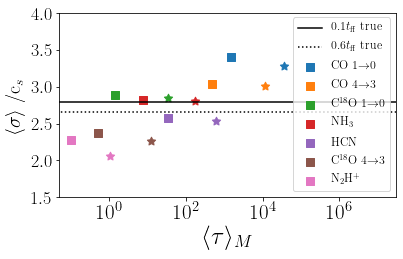

In [33]:
# in plot: different snapshot 
size = 75
beta = '02'
time_a = [10, 60]
beta_2 = '0.2'
prj_ori = 'z'
prj_ori_2 = '$\perp$'
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
c = colors[0:7]
marker = ['s',(5,1)]
ls_a = ['-',':']

for k,t in zip(range(len(time_a)),time_a):
    for s, sp3 in zip(range(len(sp3_a)), sp3_a ):
        if k==0:
            plt.scatter(locals()['t_%s_%d_%s'%(beta, t, prj_ori)][s], 
                        locals()['y_%s_%d_%s'%(beta, t, prj_ori)][s]/0.2, 
                        s=size, marker=marker[k],color = c[s], label=sp3)
        else:
            plt.scatter(locals()['t_%s_%d_%s'%(beta, t, prj_ori)][s], 
                        locals()['y_%s_%d_%s'%(beta, t, prj_ori)][s]/0.2, 
                        s=size, marker=marker[k],color = c[s])

    plt.plot(np.logspace(-2,8,1000), [locals()['y_%s_%d_%s_t'%(beta, t, prj_ori)]/0.2]*1000,
             color = 'k', ls = ls_a[k], label="%.1f$t_{\mathrm{ff}}$ true"%(t/100))
plt.xscale('log')
plt.axis([5e-2, 3e7, 1.5, 4.0])

plt.legend(loc='lower right',fontsize = 12)

plt.xlabel(r"$\langle \tau \rangle _M$",fontsize=25) 
plt.tick_params(axis="x", labelsize=21)
#plt.label_outer()

plt.tick_params(axis="y", labelsize=18)
plt.ylabel(r"$\langle \sigma \rangle$ /c$_s$",fontsize=20)

plt.rc('text', usetex=True)
plt.rc('font', family='serif',size =20)
plt.tight_layout()

plt.savefig('figure/2nd_m-tau.pdf')

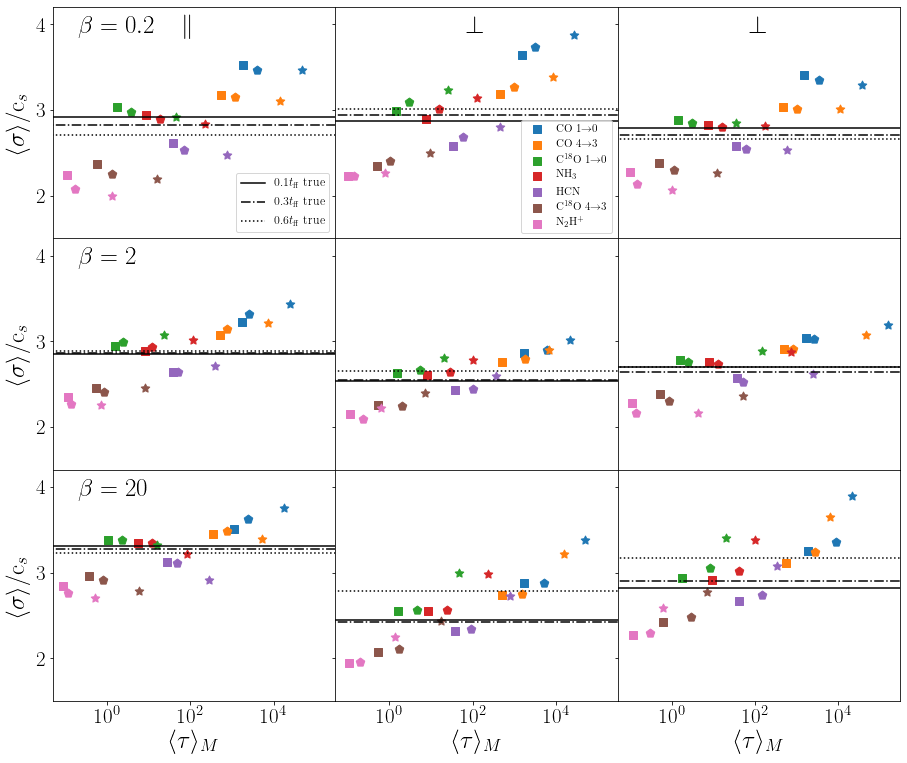

In [34]:
# row: different plasma beta  col: different orientation # in plot: different snapshot 
row = 3
col = 3
size = 80
beta_a = ['02','2','20']
time_a = [10,30,60]
beta_a2 = ['0.2','2','20']
prj_ori_a = ['x','y','z']; prj_ori_a2 = ['$\parallel$','$\perp$','$\perp$']
sp_index = [1]
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
c = colors[0:7]
marker = ['s',(5,0),(5,1)]
ls_a = ['-','-.',':']

fig, axs = plt.subplots(row, col, figsize=(13, 11), sharex=True, sharey=True,
                        tight_layout=True, gridspec_kw = {'wspace':0, 'hspace':0})

for i, beta in zip(range(row), beta_a):
    for j, prj_ori in zip(range(col), prj_ori_a):
        # Plot each graph, and manually set the y tick values
        for k,t in zip(range(len(time_a)),time_a):
            for s, sp1, sp2, sp3 in zip(range(len(sp1_a)), sp1_a, sp2_a, sp3_a ):
                if k==0 and i==0 and j==1:
                    axs[i,j].scatter(locals()['t_%s_%d_%s'%(beta, t, prj_ori)][s], 
                                locals()['y_%s_%d_%s'%(beta, t, prj_ori)][s]/0.2, 
                                s=size, marker=marker[k],color = c[s], label=sp3)
                else:
                    axs[i,j].scatter(locals()['t_%s_%d_%s'%(beta, t, prj_ori)][s], 
                                locals()['y_%s_%d_%s'%(beta, t, prj_ori)][s]/0.2, 
                                s=size, marker=marker[k],color = c[s])
            
            if i==0 and j==0:
                axs[i,j].plot(np.logspace(-2,6,1000), [locals()['y_%s_%d_%s_t'%(beta_a[i], t, prj_ori_a[j])]/0.2]*1000,
                          color='k' ,ls=ls_a[k], label="%.1f$t_{\mathrm{ff}}$ true"%(t/100))
            else:
                axs[i,j].plot(np.logspace(-2,6,1000), [locals()['y_%s_%d_%s_t'%(beta_a[i], t, prj_ori_a[j])]/0.2]*1000,
                          color='k' ,ls=ls_a[k])
        plt.xscale('log')
        plt.axis([5e-2, 3e5, 1.5, 4.2])
        if i==0 and j==0:
            axs[i,j].legend(loc='lower right',fontsize = 12)
        if i==0 and j==1:
            axs[i,j].legend(loc='lower right',fontsize = 11)
            
        if j==0:
            axs[i,j].text(2e-1, 3.9, r'$\beta=%s$'%beta_a2[i], fontsize=25)
        if i==0:
            axs[i,j].text(7e1, 3.9, prj_ori_a2[j], fontsize=25)
            
for ax in axs.flat:
    ax.set_xlabel(r"$\langle \tau \rangle _M$",fontsize=25) 
    ax.tick_params(axis="x", labelsize=21)
for ax in axs[:,0]:
    ax.tick_params(axis="y", labelsize=21)
    ax.set_ylabel(r"$\langle \sigma \rangle$/c$_s$",fontsize=25)
    

plt.subplots_adjust(wspace=0, hspace=0)
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size =20)

plt.savefig('figure/appd_2nd_m-tau.pdf')

<a id="lw_vs_em_sizes"></a>
## linewidth versus emitting sizes
[Back](#contents)

In [78]:
ACL = np.load("%s/quant/ACL.npy"%directory)
for i, beta in enumerate(beta_a):
    for j,time in enumerate(time_a):
        locals()['l_%s_%d'%(beta, time)] = np.log10(ACL[i,j,:])
        locals()['y_%s_%d'%(beta, time)] = np.log10(np.sqrt(eval('y_%s_%d_x'%(beta, time))[2:]**2+ \
                                                            eval('y_%s_%d_y'%(beta, time))[2:]**2+ \
                                                            eval('y_%s_%d_z'%(beta, time))[2:]**2)/np.sqrt(3))

In [79]:
# data for emitting sizes
z_02_10 = np.polyfit(l_02_10, y_02_10, 1)
print(z_02_10)
p_02_10 = np.poly1d(z_02_10)
z_02_30 = np.polyfit(l_02_30, y_02_30, 1)
print(z_02_30)
p_02_30 = np.poly1d(z_02_30)
z_02_60 = np.polyfit(l_02_60, y_02_60, 1)
print(z_02_60)
p_02_60 = np.poly1d(z_02_60)
z_2_10 = np.polyfit(l_2_10, y_2_10, 1)
print(z_2_10)
p_2_10 =  np.poly1d(z_2_10)
z_2_30 = np.polyfit(l_2_30, y_2_30, 1)
print(z_2_30)
p_2_30 =  np.poly1d(z_2_30)
z_2_60 = np.polyfit(l_2_60, y_2_60, 1)
print(z_2_60)
p_2_60 =  np.poly1d(z_2_60)
z_20_10 = np.polyfit(l_20_10, y_20_10, 1)
print(z_20_10)
p_20_10 = np.poly1d(z_20_10)
z_20_30 = np.polyfit(l_20_30, y_20_30, 1)
print(z_20_30)
p_20_30 = np.poly1d(z_20_30)
z_20_60 = np.polyfit(l_20_60, y_20_60, 1)
print(z_20_60)
p_20_60 = np.poly1d(z_20_60)

[ 0.18456464 -0.08967708]
[ 0.2197813 -0.050249 ]
[ 0.23155998 -0.02858035]
[ 0.10830569 -0.18999896]
[ 0.16237703 -0.13157489]
[ 0.16377889 -0.10457981]
[ 0.12874437 -0.13885054]
[ 0.17336255 -0.07680365]
[ 0.14661136 -0.07274688]


In [80]:
for i in ['02','2','20']:
    for j in ['10','30','60']:
        print(10**locals()['z_'+i+'_'+j][1])

0.8134351246713832
0.8907400842536621
0.9363099844820195
0.6456557735468692
0.7386268811671759
0.7859957421554122
0.7263558887679002
0.8379080234663673
0.8457716464400074


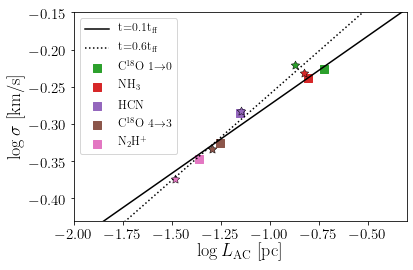

In [83]:
x = np.linspace(-2.0,-0.3,100)
beta = '02'
beta_2 = '0.2'

for s, sp3, color in zip(range(len(sp1_a)-2), sp3_a[2:], color_a[2:] ):
    plt.scatter(locals()['l_%s_10'%beta][s], locals()['y_%s_10'%beta][s], s=50, alpha=1, color=color,
                marker='s', label=sp3)
    
for s, color in zip(range(len(sp1_a)-2) ,color_a[2:] ):
    plt.scatter(locals()['l_%s_60'%beta][s], locals()['y_%s_60'%beta][s], s=80, alpha=1, color=color,
                edgecolor='k',lw=0.5, marker=(5,1))
plt.plot(x, locals()['p_%s_10'%beta](x), color='k', ls='-', label="t=0.1t$_{\mathrm{ff}}$")
plt.plot(x, locals()['p_%s_60'%beta](x), color='k', ls=':', label="t=0.6t$_{\mathrm{ff}}$")
plt.legend(loc='upper left', fontsize=12)

plt.axis([-2.0, -0.3, -0.43, -0.15])
plt.xlabel(r"$\log L_{\mathrm{AC}}$ [pc]",fontsize=18)
plt.ylabel(r"$\log \sigma $ [km/s]",fontsize=18)
    
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size = 15)

plt.tight_layout()
plt.savefig('figure/fig5.pdf')

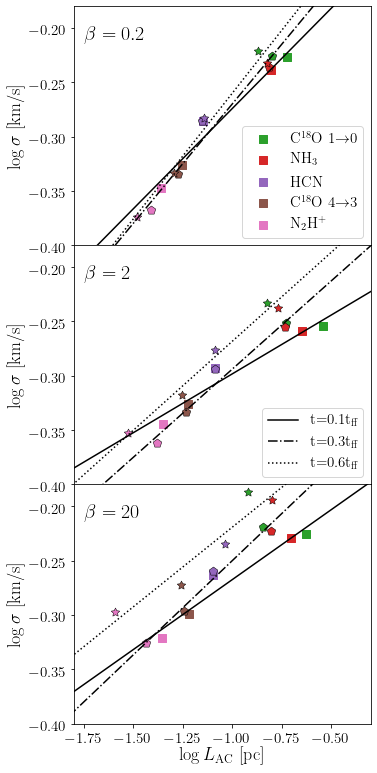

In [87]:
x = np.linspace(-2.0,-0.3,100)
marker = ['^',(5,1),(5,0)]
beta_a = ['02','2','20']
beta_a2 = ['0.2','2','20']

fig, axs = plt.subplots(3, 1, figsize=(5.5, 11), sharex=True, sharey=True,
                        tight_layout=True, gridspec_kw = {'wspace':0, 'hspace':0})

for i,beta in zip(range(3), beta_a):
    for s, color,sp3 in zip(range(len(sp1_a)-2) ,color_a[2:],sp3_a[2:] ):
        if i==0:
            axs[i].scatter(locals()['l_%s_10'%beta][s], locals()['y_%s_10'%beta][s], s=50, alpha=1, color=color,
                    marker='s', label=sp3)
        else:
            axs[i].scatter(locals()['l_%s_10'%beta][s], locals()['y_%s_10'%beta][s], s=50, alpha=1, color=color,
                    marker='s')
    for s, color in zip(range(len(sp1_a)-2) ,color_a[2:] ):
        axs[i].scatter(locals()['l_%s_30'%beta][s], locals()['y_%s_30'%beta][s], s=80, alpha=1, color=color,
                    edgecolor='k',lw=0.5, marker=(5,0))
    for s, color in zip(range(len(sp1_a)-2) ,color_a[2:] ):
        axs[i].scatter(locals()['l_%s_60'%beta][s], locals()['y_%s_60'%beta][s], s=80, alpha=1, color=color,
                    edgecolor='k',lw=0.5, marker=(5,1))
    if i==1:     
        axs[i].plot(x, locals()['p_%s_10'%beta](x), color='k', ls='-', label="t=0.1t$_{\mathrm{ff}}$")
        axs[i].plot(x, locals()['p_%s_30'%beta](x), color='k', ls='-.', label="t=0.3t$_{\mathrm{ff}}$")
        axs[i].plot(x, locals()['p_%s_60'%beta](x), color='k', ls=':', label="t=0.6t$_{\mathrm{ff}}$")
    else:
        axs[i].plot(x, locals()['p_%s_10'%beta](x), color='k', ls='-')
        axs[i].plot(x, locals()['p_%s_30'%beta](x), color='k', ls='-.')
        axs[i].plot(x, locals()['p_%s_60'%beta](x), color='k', ls=':')
    axs[i].text(-1.75, -0.21, r'$\beta=%s$'%beta_a2[i], fontsize=20)

axs[0].legend(loc='lower right')
axs[1].legend(loc='lower right')

plt.axis([-1.8, -0.3, -0.40, -0.18])
for ax in axs.flat:
    ax.set_xlabel(r"$\log L_{\mathrm{AC}}$ [pc]",fontsize=18)
    ax.set_ylabel(r"$\log \sigma $ [km/s]",fontsize=18)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size = 15)
plt.savefig('figure/appd_fig5.pdf')

In [37]:
sp5_a = ['co', 'co_4_3', 'c18o', 'pnh3', 'hcn', 'c18o_4_3', 'n2h']

beta_a = ['0.2','2','20']
time_a = ['10','30','60']
beta_a2 = ['0.2','2','20']
prj_ori_a = ['x','y','z']
prj_ori_a2 = ['$\parallel$','$\perp$','$\perp$']

# general case
for sp in sp2_a:
    locals()['sigma'+sp] = []
sigma_true = []



for prj_ori in prj_ori_a:
    # analysis for each beta
    for time in time_a:
        for beta in beta_a:
            for sp,sp5 in zip(sp2_a, sp5_a):
                locals()['sigma'+sp].append(np.loadtxt('%s/moment/beta%s_%s_%s/m2_%s.txt'%(directory,beta,time,prj_ori,sp5)))
            sigma_true.append(np.loadtxt('%s/moment/beta%s_%s_%s/m2_true.txt'%(directory,beta,time,prj_ori) ) )
    
for sp in sp2_a:                
    locals()['ratio_%s'%(sp)] = (np.array(locals()['sigma'+sp])/np.array(sigma_true)).flatten()

# Comparison of beta
for sp in sp2_a:
    locals()['sigma'+sp] = []
sigma_true = []

for beta in beta_a:
    # analysis for each beta
    for time in time_a:
        for prj_ori in prj_ori_a:
            for sp,sp5 in zip(sp2_a, sp5_a):
                locals()['sigma'+sp].append(np.loadtxt('%s/moment/beta%s_%s_%s/m2_%s.txt'%(directory,beta,time,prj_ori,sp5)))
            sigma_true.append(np.loadtxt('%s/moment/beta%s_%s_%s/m2_true.txt'%(directory,beta,time,prj_ori) ) )
    
    for sp in sp2_a:                
        locals()['ratio_beta%s_%s'%(beta,sp)] = (np.array(locals()['sigma'+sp])/np.array(sigma_true)).flatten()

# Comparison of time
for sp in sp2_a:
    locals()['sigma'+sp] = []
sigma_true = []

for time in time_a:
    # analysis for each time
    for beta in beta_a:
        for prj_ori in prj_ori_a:
            for sp,sp5 in zip(sp2_a, sp5_a):
                locals()['sigma'+sp].append(np.loadtxt('%s/moment/beta%s_%s_%s/m2_%s.txt'%(directory,beta,time,prj_ori,sp5)))
            sigma_true.append(np.loadtxt('%s/moment/beta%s_%s_%s/m2_true.txt'%(directory,beta,time,prj_ori) ) )
    
    for sp in sp2_a:                
        locals()['ratio_time%s_%s'%(time,sp)] = (np.array(locals()['sigma'+sp])/np.array(sigma_true)).flatten()

# comparison of orientation
for sp in sp2_a:
    locals()['sigma'+sp] = []
sigma_true = []

for prj_ori in prj_ori_a:
    # analysis for each beta
    for time in time_a:
        for beta in beta_a:
            for sp,sp5 in zip(sp2_a, sp5_a):
                locals()['sigma'+sp].append(np.loadtxt('%s/moment/beta%s_%s_%s/m2_%s.txt'%(directory,beta,time,prj_ori,sp5)))
            sigma_true.append(np.loadtxt('%s/moment/beta%s_%s_%s/m2_true.txt'%(directory,beta,time,prj_ori) ) )
    
    for sp in sp2_a:                
        locals()['ratio_prj_ori%s_%s'%(prj_ori,sp)] = (np.array(locals()['sigma'+sp])/np.array(sigma_true)).flatten()

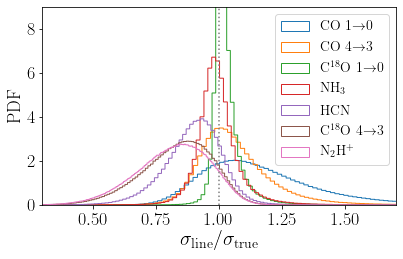

In [42]:
for sp in sp2_a:                
    locals()['ratio_%s'%(sp)] = (np.array(locals()['sigma'+sp])/np.array(sigma_true)).flatten()
    
y = np.linspace(0,10,100)
x = np.zeros(100)+1

# Plot each graph, and manually set the y tick values
for s, sp2, sp3 in zip(range(len(sp1_a)) , sp2_a, sp3_a):  
    n, bins, patches = (plt.hist(locals()['ratio_%s'%(sp2)],600, histtype='step', density=1,label = sp3))
plt.plot(x,y,':')
plt.axis([0.3,1.7, 0, 9])
plt.legend(loc='upper right',fontsize = 14)

# set axis
plt.xlabel(r"$\sigma_{\mathrm{line}}/\sigma_{\mathrm{true}}$",fontsize=20) 
plt.tick_params(axis="x", labelsize=18); plt.tick_params(axis="y", labelsize=18)
plt.ylabel("PDF",fontsize=18)

# latex font
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.tight_layout()
plt.savefig('figure/sigma_line_vs_sigma_true_all.pdf')

C:\Users\YYX\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
C:\Users\YYX\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


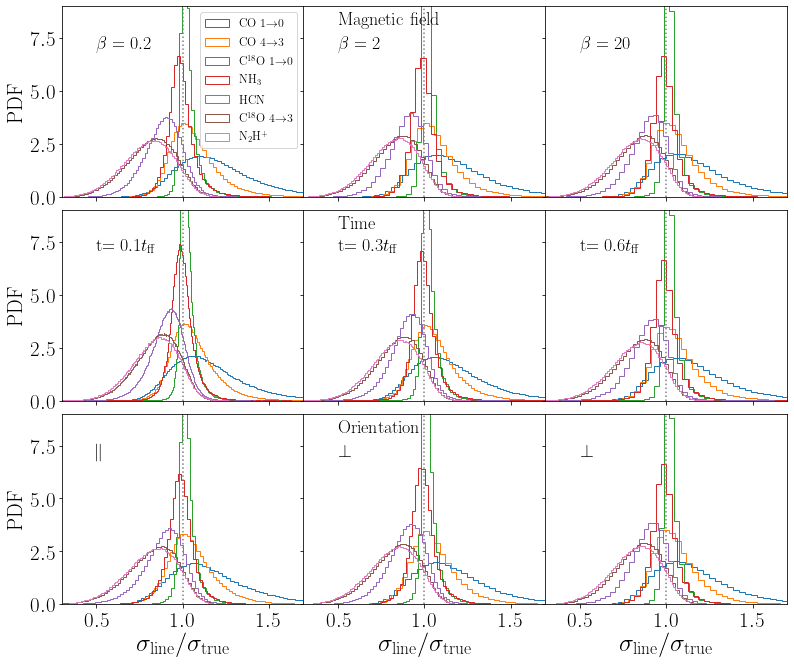

In [46]:
row = 3; col=3
var_row = ['beta','time','prj_ori']
text_a = ['\beta=','t=','orientation:']
prj_ori_a3 = ['\parallel','\perp','\perp']
time_a2 = ['0.1t_{\mathrm{ff}}','0.3t_{\mathrm{ff}}','0.6t_{\mathrm{ff}}']
fig, axs = plt.subplots(row, col, figsize=(13, 11), sharex=True, sharey=True,
                        tight_layout=True, gridspec_kw = {'wspace':0, 'hspace':0.07})

y = np.linspace(0,10,100)
x = np.zeros(100)+1
for i in range(row):
    for j in range(col):
        # Plot each graph, and manually set the y tick values
        for sp2,sp3 in zip(sp2_a, sp3_a): 
            n, bins, patches = (axs[i][j].hist(locals()['ratio_%s%s_%s'%(var_row[i],locals()[var_row[i]+'_a'][j],sp2)]
                                               ,300, histtype='step', density=1,label = sp3))
            
        axs[i][j].plot(x,y,':')
        plt.axis([0.3,1.7, 0, 9])
        
        if i==0 and j==0:
            axs[i,j].legend(loc='upper right',fontsize = 12)
        if i==0:
            axs[i,j].text(0.5, 7., r'$\beta = %s$'%(beta_a2[j]), fontsize=18)
            if j==1:
                axs[i,j].text(0.5, 8.15, r'Magnetic field', fontsize=18)
        if i==1:
            axs[i,j].text(0.5, 7., r't$=%s$'%(time_a2[j]), fontsize=18)
            if j==1:
                axs[i,j].text(0.5, 8.15, 'Time', fontsize=18)
        if i==2:
            axs[i,j].text(0.5, 7., r'$%s$'%(prj_ori_a3[j]), fontsize=18)
            if j==1:
                axs[i,j].text(0.5, 8.15, r'Orientation', fontsize=18)
# set axis
for ax in axs[2,:]:
    ax.set_xlabel(r"$\sigma_{\mathrm{line}}/\sigma_{\mathrm{true}}$",fontsize=25) 
    ax.tick_params(axis="x", labelsize=21)
for ax in axs[:,0]:
    ax.tick_params(axis="y", labelsize=21)
    ax.set_ylabel(r"PDF",fontsize=21)

# latex font
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size =20)

plt.savefig('figure/sigma_line_vs_sigma_true.pdf')

***
<a id="rescale"></a>
## Investigation on different density scalings



[Back](#contents)

In [99]:
sca = np.array([0.1, 1, 10])
lw_01 = np.load("%s/quant/linewidth_rescale_0.1.npy"%directory)
lw_10 = np.load("%s/quant/linewidth_rescale_10.0.npy"%directory)
true_a = np.ravel(lw_true)
for s, sp2 in enumerate(sp2_a):
    locals()[sp2+'_01'] = np.ravel(lw_01[:,:,:,s])
    locals()[sp2+'_1'] = np.ravel(lw[:,:,:,s])
    locals()[sp2+'_10'] = np.ravel(lw_10[:,:,:,s])
    ratio_01 = np.average(locals()['%s_01'%sp2 ]/true_a)
    ratio_1 = np.average(locals()['%s_1'%sp2 ]/true_a)
    ratio_10 = np.average(locals()['%s_10'%sp2 ]/true_a)
    locals()['ratio_%s'%sp2 ] = np.array([ratio_01,ratio_1,ratio_10])

In [94]:
lw

0.4535617208277346

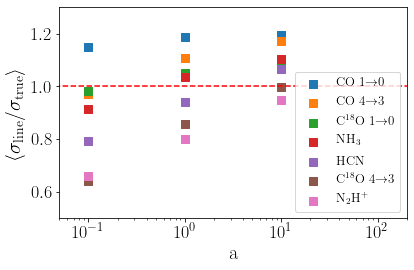

In [101]:
for s, sp1, sp2, sp3 in zip(range(len(sp1_a)), sp1_a, sp2_a, sp3_a):
    #if s==1:
    #    plt.scatter(sca[1:], eval('ratio_'+sp2)[1:], s=50, marker='s')
    #    plt.scatter(sca[0]*1.12, eval('ratio_'+sp2)[0], s=50, marker='s', label=sp3, color=color_a[s]) # co 4-3 at SNR ~5
    #elif s==2:
    #    plt.scatter(sca[:2], eval('ratio_'+sp2)[:2], s=50, marker='s')
    #    plt.scatter(sca[2]*1.12, eval('ratio_'+sp2)[2], s=50, marker='s', label=sp3, color=color_a[s]) # c18o 1-0 at SNR ~20
    plt.scatter(sca, eval('ratio_'+sp2), s=50, marker='s', label=sp3)
    



plt.plot(np.logspace(-2,2.5,100),[1]*100,'r--')
plt.xscale('log')
plt.axis([5e-2, 2e2, 0.50, 1.30])
plt.xlabel("a",fontsize=20);plt.ylabel(r'$\langle\sigma_{\rm line}/\sigma_{\rm true}\rangle$',fontsize=20);
plt.legend(loc='lower right',fontsize = '13')
plt.tick_params(axis="y", labelsize=18);plt.tick_params(axis="x", labelsize=18)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.tight_layout()
plt.savefig('figure/ratio.pdf')

***
<a id="telescope"></a>
## Modeling telescope effect



[Back](#contents)

In [47]:
# rebin the original PPV
def rebin(a, *args):
    '''rebin ndarray data into a smaller ndarray of the same rank whose dimensions
    are factors of the original dimensions. eg. An array with 6 columns and 4 rows
    can be reduced to have 6,3,2 or 1 columns and 4,2 or 1 rows.
    example usages:
    >>> a=rand(6,4); b=rebin(a,3,2)
    >>> a=rand(6); b=rebin(a,2)
    '''
    shape = a.shape
    lenShape = len(shape)
    factor = np.array(np.asarray(shape)/np.asarray(args), dtype=int)
    evList = ['a.reshape('] + \
             ['args[%d],factor[%d],'%(i,i) for i in range(lenShape)] + \
             [')'] + ['.sum(%d)'%(i+1) for i in range(lenShape)] 
    print(''.join(evList))
    return eval(''.join(evList))

In [114]:
sp1_a = ['CO', 'CO_4_3', 'C18O', 'pNH3', 'HCN', 'C18O_4_3', 'N2H']
sp2_a = ['co', 'co_4_3', 'c18o', 'pnh3', 'hcn', 'c18o_4_3', 'n2h']
sp3_a = [r'CO 1$\to$0', r'HCN']
cb_l_a = ['CO\\, 1\\to0 ', 'HCN']
#sp1_a = np.array(sp1_a)[[0,4]]
#sp2_a = np.array(sp2_a)[[0,4]]

In [111]:
beta = '0.2'
beta_2 = '02'
time = '10'
prj_ori = 'z'

n_channel=100 #100
n_pix = 51 #4.6/51~  0.1pc
vr = 4.
dv_h = 2*vr/200 # dv with high resolution 
dv = 2*vr/n_channel # dv with tele res
beam_x = 0.1
beam_y = 0.1
size_cell = 4.6/256
sigma_x=beam_x/2/np.sqrt(2*np.log(2))/size_cell
sigma_y=beam_y/2/np.sqrt(2*np.log(2))/size_cell

v = np.linspace(-vr, vr, n_channel)
SNR = 20.


for sp1, sp2 in zip(sp1_a, sp2_a):
    filename = "C:/Users/YYX/Desktop/Tracers_LS_relation/Analysis/PPV/beta%s_%s_%s/cube_%s_%s_%s_L%s.fits" \
                %(beta,time, prj_ori,beta, time, prj_ori, sp2)
    cube = fits.open(filename)   
    cube = cube['%s_Luminosity'%sp1].data
    cube = cube[:200,:255,:255]
    locals()['cube_%s_%s_%s'%(beta, time, sp2)] = cube
    # do beam convolution for each velocity channel
    for i in range(200):
        cube[i,:,:] = gaussian_filter(cube[i,:,:], sigma=[sigma_x, sigma_y])
    # rebin the PPV 
    cube = rebin(cube,n_channel,n_pix,n_pix)
    
    # add noise 
    lum_mean = np.mean(cube[int(n_channel/2),:,:])
    sigma_lum = lum_mean/SNR
    locals()['sigma_lum_%s'%(sp2)] = sigma_lum
    print('noise level:',sigma_lum)
    cube_noise_unmask = np.random.normal(cube, sigma_lum)
    noise = cube_noise_unmask-cube
    
    cube_noise=cube_noise_unmask.copy()
    cube_noise[cube_noise<3*sigma_lum]=0 
    locals()['cube_noise_unmask_%s_%s_%s_%s'%(SNR, beta_2, time, sp2)] = cube_noise_unmask
    locals()['cube_noise_%s_%s_%s_%s'%(SNR, beta_2, time, sp2)] = cube_noise
    #Velocity-integrated measurement = Sum_i L_i dv
    #Noise in a single channel is sigma_channel
    #Noise summing over all channels is sigma_channel * dv * sqrt(number of channels)
    #Only keep pixels where detected signal > 3 * noise level, i.e., where Sum_i L_i dv > 3 * sigma_channel * dv * sqrt(N_channel)
    L_int = np.sum(cube_noise*dv, axis=0)
    noise_int = sigma_lum*dv*np.sqrt(n_channel)


    good_pix_x_a, good_pix_y_a = np.where(L_int>3*noise_int)

    # calculate second moment in 'good' pixels
    m0 = np.zeros((n_pix,n_pix))
    m2 = np.zeros((n_pix,n_pix))
    m0_a = []
    m2_a = []
    
    for x, y in zip(good_pix_x_a, good_pix_y_a):
        lum_los = cube_noise[:,x,y] # lum array in beam 
        m0[x,y] = np.sum(lum_los)
        m1 = np.sum(v*lum_los)/m0[x,y]
        m2[x,y] = np.sum((v-m1)**2*lum_los)/m0[x,y]
        m0_a.append(m0[x,y])
        m2_a.append(m2[x,y])

    m2 = np.sqrt(m2)
    m2_a = np.sqrt(m2_a)
    # luminosity weighted mean second moment over the whole map
    lw = np.average(m2_a, weights=m0_a)

    print('linewidth of species %s with SNR %d: %.3f'%(sp1, SNR, lw))

a.reshape(args[0],factor[0],args[1],factor[1],args[2],factor[2],).sum(1).sum(2).sum(3)
noise level: 4.588418911017554e+23
linewidth of species CO with SNR 20: 0.662
a.reshape(args[0],factor[0],args[1],factor[1],args[2],factor[2],).sum(1).sum(2).sum(3)
noise level: 6.044643384982435e+24
linewidth of species CO_4_3 with SNR 20: 0.595
a.reshape(args[0],factor[0],args[1],factor[1],args[2],factor[2],).sum(1).sum(2).sum(3)
noise level: 2.403786415933435e+22
linewidth of species C18O with SNR 20: 0.556
a.reshape(args[0],factor[0],args[1],factor[1],args[2],factor[2],).sum(1).sum(2).sum(3)
noise level: 5.8605111880217474e+20
linewidth of species pNH3 with SNR 20: 0.551
a.reshape(args[0],factor[0],args[1],factor[1],args[2],factor[2],).sum(1).sum(2).sum(3)
noise level: 1.0742841275097184e+22
linewidth of species HCN with SNR 20: 0.518
a.reshape(args[0],factor[0],args[1],factor[1],args[2],factor[2],).sum(1).sum(2).sum(3)
noise level: 9.317027246374335e+22
linewidth of species C18O_4_3 with SNR 20:

In [51]:
pi = np.pi
km = 1.e5
pc = 3.0856e18
yr = 365.25*24.*3600.

c = 2.99792458e10
kB = 1.38065812e-16
mH = 2.34e-24	#effective mass per H nucleus
nH = 1.0e4  	#threshold volume density
t_rho = nH*mH		#threshold volume density in g/cm**3
nu_co = 115.3e9 #line frequency of CO(1-0)
lambd_co = c/nu_co	#wavelenght of CO(1-0)
nu_hcn = 88.631847e9 #line frequency of HCN(1-0)
lambd_hcn = c/nu_hcn	#wavelenght of HCN(1-0)
L = 1.70665264e+50**(1/3)/pc # length of pixels in pc

conversion_co = lambd_co**3/8/pi/kB/pc/pc/km 
conversion_hcn = lambd_hcn**3/8/pi/kB/pc/pc/km #convert erg/s to K km/s 



C:\Users\YYX\Anaconda3\lib\site-packages\ipykernel_launcher.py:114: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 432x288 with 0 Axes>

C:\Users\YYX\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


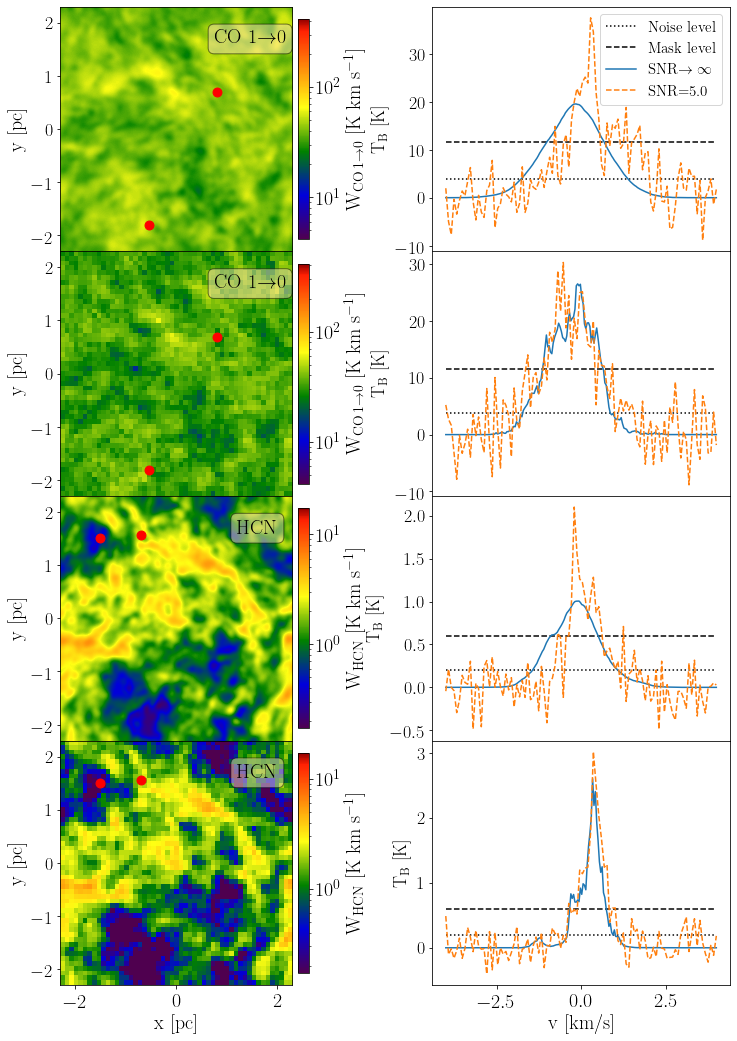

In [62]:
# row: different plasma beta  col: different orientation # in plot: different snapshot 
row = 2
col = 2
size = 75
prj_ori_a = ['z']; prj_ori_a2 = ['$\perp$']
sp_id = [0,4]# CO 1->0 HCN
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

plt.subplots_adjust(left=0.01, right=0.99,bottom=0.0, top=1.0)
fig, axs = plt.subplots(4, 2, figsize=(12, 18), sharex=False, sharey=False,
                        tight_layout=True, gridspec_kw = {'wspace':0.25, 'hspace':0.0})

ppv_fac=256
x = np.linspace(2.3,-2.3,255)
y = np.linspace(-2.3,2.3,255)

for i, sp2, sp3, cb_l in zip(range(len(sp2_a)), sp2_a, sp3_a, cb_l_a):
    cube = locals()['cube_%s_%s_%s'%(beta, time, sp2)]*ppv_fac # the factor of 256 may seem confusing here, 
    # but it is just used to make the intensity map consistent to the fig 1 in the paper. It seems that ppv cube 
    # returned from yt decrease the value of luminosity unreasonablely.
    cube_noise = locals()['cube_noise_%s_%s_%s_%s'%(SNR, beta_2, time, sp2)]*ppv_fac
    cube_noise_unmask = locals()['cube_noise_unmask_%s_%s_%s_%s'%(SNR, beta_2, time, sp2)]*ppv_fac 
    im = np.sum(cube, axis=0)*eval('conversion_'+sp2)/L**2
    im_noise = np.sum(cube_noise, axis=0)*eval('conversion_'+sp2)/(L*5)**2
    
    #r = 10**np.average( np.log10(im) )
    r = np.average( im )
    im_noise[im_noise==0]=1e-30
    #r_n = 10**np.average( np.log10(im_noise) )
    r_n = np.average(im_noise)
    
    # intensity map
    locals()['p_'+str(i)] = axs[int(2*i)][0].imshow(im, aspect='auto', origin='lower',
           cmap="bds_highcontrast",norm=LogNorm(), 
           extent=(-2.3,2.3 ,-2.3 ,2.3 ),
           vmin=r/10, vmax=r*10)
    cbar = fig.colorbar(locals()['p_'+str(i)], shrink=0.9, aspect=20, fraction=.20,pad=.02, ax=axs[int(2*i)][0])
    cbar.set_label(r'W$_{\rm %s}$ [K km s$^{-1}$]'%cb_l,size=20)
    locals()['p_'+str(i)+'n'] = axs[int(2*i+1)][0].imshow(im_noise, aspect='auto', origin='lower',
           cmap="bds_highcontrast",norm=LogNorm(),
           extent=(-2.3,2.3 ,-2.3 ,2.3 ),
           vmin=r/10, vmax=r*10)
    cbar = fig.colorbar(locals()['p_'+str(i)+'n'], shrink=0.9, aspect=20, fraction=.20,pad=.02, ax=axs[int(2*i+1)][0])
    cbar.set_label(r'W$_{\rm %s}$ [K km s$^{-1}$]'%cb_l,size=20)
    
    # select spectrum
    x1,y1 = np.where( np.abs(im-r) == np.min( np.abs(im-r) ) )
    #x1,y1 = np.where( np.abs(im_noise-r_n) == np.min( np.abs(im_noise-r_n) ) )
    x2,y2 = np.where(im==np.median(im))
    (x1,x2,y1,y2)= (int(x1),int(x2),int(y1),int(y2))
    
    axs[int(2*i)][0].scatter(x[[x1,x2]], y[[y1,y2]], s=80, marker='o',color='r')
    axs[int(2*i+1)][0].scatter(x[[x1,x2]], y[[y1,y2]],s=80, marker='o',color='r')
    
    #spc = cube[::-1,int(x1),int(y1)]*eval('conversion_'+sp2)/L**2/dv_h
    spc = np.average(cube[::-1,:,:], axis=(1,2) )*eval('conversion_'+sp2)/L**2/dv_h
    spc_noise_unmask = cube_noise_unmask[::-1,int(x1/5),int(y1/5)]*eval('conversion_'+sp2)/(L)**2/dv_h
    spc_noise = cube_noise[::-1,int(x1/5),int(y1/5)]*eval('conversion_'+sp2)/(L)**2/dv_h
    
    spc2 = cube[::-1,int(x2),int(y2)]*eval('conversion_'+sp2)/L**2/dv_h
    spc_noise2_unmask = cube_noise_unmask[::-1,int(x2/5),int(y2/5)]*eval('conversion_'+sp2)/(L)**2/dv_h
    spc_noise2 = cube_noise[::-1,int(x2/5),int(y2/5)]*eval('conversion_'+sp2)/(L)**2/dv_h
    # spectrum
    v_h = np.linspace(-vr, vr, 200)
    v = np.linspace(-vr, vr, n_channel)
    
    noise_K = locals()['sigma_lum_%s'%(sp2)]*ppv_fac/50*eval('conversion_'+sp2)/(L)**2/dv_h
    axs[int(2*i)][1].plot(v_h, [noise_K ]*200, 'k:',label='Noise level')
    axs[int(2*i)][1].plot(v_h, [3*noise_K ]*200, 'k--', label='Mask level')
    axs[int(2*i)][1].plot(v_h, spc, label=r'SNR$\to\infty$')
    #axs[int(2*i)][1].plot(v, spc_noise/50, label='SNR=%s'%SNR)#spc_noise)
    axs[int(2*i)][1].plot(v, spc_noise_unmask/50, '--', label='SNR=%s'%SNR)#label='unmasked')

    
    axs[int(2*i+1)][1].plot(v_h, [noise_K ]*200, 'k:')
    axs[int(2*i+1)][1].plot(v_h, [3*noise_K]*200, 'k--')
    axs[int(2*i+1)][1].plot(v_h, spc2)
    #axs[int(2*i+1)][1].plot(v, spc_noise2/50)#spc_noise)
    axs[int(2*i+1)][1].plot(v, spc_noise2_unmask/50,'--')#spc_noise)
    
axs[3][0].set_xlabel(r"x [pc]",fontsize=20)  
axs[3][1].set_xlabel(r"v [km/s]",fontsize=20)  

axs[0][0].text(0.75, 1.6, sp3_a[0], fontsize=20, bbox=props)
axs[1][0].text(0.75, 1.6, sp3_a[0], fontsize=20, bbox=props)
axs[2][0].text(1.2, 1.6, sp3_a[1], fontsize=20, bbox=props)
axs[3][0].text(1.2, 1.6, sp3_a[1], fontsize=20, bbox=props)

#axs[0][1].axis([-4.1, 4.1, -10, 200])
#axs[1][1].axis([-4.1, 4.1, -10, 200])
#axs[2][1].axis([-4.1, 4.1, -1, 15])
#axs[3][1].axis([-4.1, 4.1, -1, 15])
#for ax in axs.flat:
    
for ax in axs[:,0]:
    ax.axis([-2.3, 2.3, -2.3, 2.3])
    ax.tick_params(axis="y", labelsize=18)
    ax.set_ylabel(r'y [pc]',fontsize=20)

axs[0,1].legend(loc='upper right', fontsize = 15)
for ax in axs[:,1]:
    ax.tick_params(axis="y", labelsize=18)
for ax in axs[0:4,1]:
    ax.set_ylabel(r'T$_{\rm B}$ [K]',fontsize=18)

#axs[0][1].text(-4, 180, sp3_a[0], fontsize=20)
#axs[1][1].text(-4, 180, sp3_a[0], fontsize=20)
#axs[2][1].text(-4, 13, sp3_a[1], fontsize=20)
#axs[3][1].text(-4, 13, sp3_a[1], fontsize=20)
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=20)
plt.savefig('figure/noise_eff.pdf')

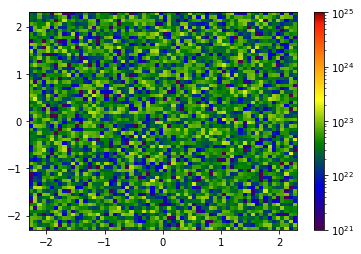

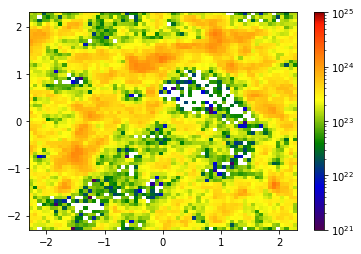

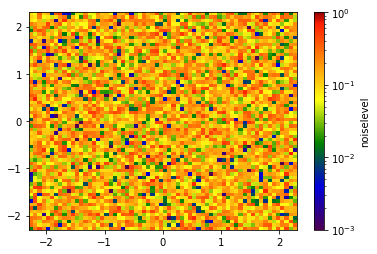

In [21]:
# map of noise
# map of noise
plt.imshow(np.abs(noise[50,:,:]), aspect='auto', origin='lower',
           cmap="bds_highcontrast",extent=(-2.3,2.3 ,-2.3 ,2.3 ),Norm=LogNorm(),vmin=1e21, vmax=1e25)
# map of PPV
plt.colorbar()
plt.show()

# map of noise
plt.imshow(cube_noise[50,:,:], aspect='auto', origin='lower',
           cmap="bds_highcontrast",extent=(-2.3,2.3 ,-2.3 ,2.3 ),Norm=LogNorm(),vmin=1e21, vmax=1e25)
# map of PPV
plt.colorbar()
plt.show()

# map of noise
plt.imshow(np.abs(noise[50,:,:])/lum_mean, aspect='auto', origin='lower',
           cmap="bds_highcontrast",extent=(-2.3,2.3 ,-2.3 ,2.3 ),Norm=LogNorm(),vmin=1e-3, vmax=1)
# map of PPV
cb = plt.colorbar()
cb.set_label('noise'   'level')

In [112]:
# bias induced by telescope effect 
# beta=0.2 time=0.1 tff

snr = [5, 10, 20]

true = 0.56

# SNR-> infty
co = 0.68
co_4_3 = 0.61
c18o = 0.58
pnh3 = 0.57 
hcn = 0.52
c18o_4_3 = 0.48
n2h = 0.45

co_snr = np.array([0.540,0.620, 0.662])
co_4_3_snr = np.array([0.501, 0.561, 0.595])
c18o_snr = np.array([0.465, 0.518, 0.556])
pnh3_snr = np.array([0.473, 0.520, 0.551])
hcn_snr = np.array([0.450, 0.491, 0.518])
c18o_4_3_snr = np.array([0.434, 0.462, 0.485])
n2h_snr = np.array([0.417, 0.445, 0.469])

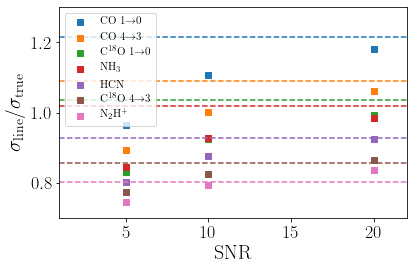

In [127]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
c = colors[0:7]
marker = ['s',(5,0),(5,1)]
ls = '--'

size=45
for s, sp1, sp2, sp3 in zip(range(len(sp1_a)), sp1_a, sp2_a, sp3_a):
    locals()['ratio_%s'%sp2] = locals()[sp2]/true
    locals()['ratio_%s_snr'%sp2] = locals()['%s_snr'%sp2]/true
    plt.scatter(snr, locals()['ratio_%s_snr'%sp2], s=size, label=sp3, marker='s')
    plt.plot(np.logspace(0,15,100), [locals()['ratio_%s'%sp2]]*100,
             color = c[s], ls = ls)
plt.axis([1, 22, 0.7, 1.3])

plt.xlabel("SNR",fontsize=20);plt.ylabel(r'$\sigma_{\rm line}/\sigma_{\rm true}$',fontsize=20);
plt.legend(loc='upper left',fontsize = '11')
plt.tick_params(axis="y", labelsize=18);plt.tick_params(axis="x", labelsize=18)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.tight_layout()
plt.savefig('figure/noise.pdf')